### Notebook B

# In Banks We Trust:

## Predicting the Propensity to Avail Formal Financial Services in the Philippines

### Feature Engineering the Target Variable

This notebook discusses how the target variable was extracted from the Consumer Finance Survey (CFS) dataset. The target variable was identified in two steps. 

Step 1: Identifying respondents who have **no deposit account and answered "do not have enough money"** as reason for having no account;

Step 2: Among respondents identified in step 1, their response to the question **"If you have surplus money, where will you put the money?"** was stratified.

In [8]:
import numpy as np
import pandas as pd

## Derived Feature 1: "Reason_no_acct"

Respondents to the CFS were asked if any member of their household holds a deposit account. From those who have deposit account, they were also asked "what is the main reason why your family does not have an account/investment?". 

- The following options were given to the respondents to choose from:

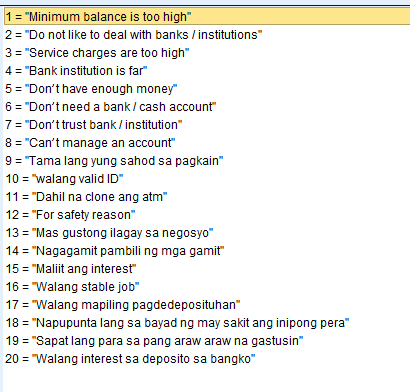

In [9]:
raw2 = pd.read_excel('New Features.xlsx', sheet_name='Reason_no_acct', na_values='')

In [10]:
# create a dictionary with the new classes as keys and old classes as items
classes = {'None':[0],
           'Minimum balance is too high':[1],
           'Do not like to deal with banks':[2,10,17],
           'Service charges are too high':[3],
           'Bank is far':[4],
           'Do not have enough money':[5,9,14,16,18,19],
           'Do not need a bank account':[6],
           'Do not trust bank':[7,11,12],
           'Cannot manage bank account':[8],
           'Gains in banks are low':[13,15,20]}

# unpack the old classes and reverse the dictionary
mapping = {v: k for k,vv in classes.items() for v in vv}
mapping

{0: 'None',
 1: 'Minimum balance is too high',
 2: 'Do not like to deal with banks',
 10: 'Do not like to deal with banks',
 17: 'Do not like to deal with banks',
 3: 'Service charges are too high',
 4: 'Bank is far',
 5: 'Do not have enough money',
 9: 'Do not have enough money',
 14: 'Do not have enough money',
 16: 'Do not have enough money',
 18: 'Do not have enough money',
 19: 'Do not have enough money',
 6: 'Do not need a bank account',
 7: 'Do not trust bank',
 11: 'Do not trust bank',
 12: 'Do not trust bank',
 8: 'Cannot manage bank account',
 13: 'Gains in banks are low',
 15: 'Gains in banks are low',
 20: 'Gains in banks are low'}

In [11]:
raw2.E2 = raw2.E2.map(mapping)

In [12]:
raw2.columns=['Reason_no_acct']

In [22]:
raw2.head()

,Reason_no_acct
0,Do not have enough money
1,Do not have enough money
2,Do not have enough money
3,Do not have enough money
4,Do not have enough money


In [23]:
raw2.shape

(15503, 1)

In [13]:
raw2.to_csv('Reason_no_acct.csv', header=True, index=False)

## Derived Feature 2 : "Extra_Money"

The CFS questionnaire also included section on "**Risk Attitude and Belief**" wherein the respondents were asked "If you have surplus money, where will you put the money?" Responses to this question were grouped together as to the affinity towards either a formal or institutional approach to the management of finances.

  - **Formal**
    - L101: Deposit / Save in Bank
    - L102: Investment (Stocks, Mutual Funds, UITFS)
    - L107: Life insurance / Pension Plan
    - L108: Education Plan
  
  - **Informal**
    - L104: Keep in piggy bank / for emergency
    - L119: Itatabi ko lang sa bahay
    - L120: Pitaka
    - L121: Sa bulsa
    - L124: Itatago lang sa wallet

  - **Spend**
    - L103: Put up / Invest in business / Buy goods for sale / inventory
    - L105: Pay debt
    - L106: For tuition
    - L109: Buy car / appliances
    - L110: Buy house / condo
    - L111: Buy Land
    - L112: Renovate / House improvements
    - L113: Vacation travel – local / abroad
    - L114: Shopping
    - L115: Help parents / relatives
    - L116: Give to charity / church
    - L117: Pinapautang
    - L118: Microfinance
    - L122: For food
    - L123: Pambaon ng mga estudyante
    - L125: Medical
    - L126: Buy tricycle
    - L127: Pambayad sa monthly bills
    - L128: Panggastos sa araw-araw
    - L129: Pambili ng baboy para palakihin
    - L130: Pambili ng kalabaw
    - L131: Bumili ng baka
    - L132: Ibibigay sa anak
    - L133: Ibinibili ng gamit ang anak
    - L134: Ilaw
    - L135: Ibinili ng machine
    - L136: Kumakain sa mamahalin restaurant
    - L137: Mamamasyal kasama ang anak
    - L138: Idinagdag sa puhunan
    - L139: Nagpabakod ng lupa
    - L140: Pinambili ng mga gamit sa bukid
    - L141: Sa panganganak
    - L142: Pagpapakabit ng kuryente
    - L143: Buy boat
    - L144: Buy feeds
    - L145: Ibibigay sa simbahan
    - L146: Sugal
    - L147: Binili ng vitamins
    - L148: Buy personal needs
    - L149: For allowance
    - L150: Buy animals
    - L151: Abono
    
Using the above groupings, a new excel sheet named "**Extra Money**" as shown in the code below is created.

In [14]:
raw = pd.read_excel('New Features.xlsx', sheet_name='Extra_Money')

##### Total = Formal + Informal

In [15]:
raw.head()

,L101,L102,L107,L108,Formal,L118,L104,L119,L120,L121,L124,Informal,Total
0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,0,0,0,1,1
4,0,0,0,0,0,0,1,0,0,0,0,1,1


In [16]:
raw.groupby('Total').size()

Total
0     2986
1    11037
2     1480
dtype: int64

In [17]:
raw.shape

(15503, 13)

##### Creating a new feature "Extra_Money" 

In [18]:
def get_target(df):
    t = []
    for i in range(df.shape[0]):
        if df.loc[i, 'Total']==0:
            t.append('Spend')
        if df.loc[i, 'Total']==2:
            t.append('Both')
        if df.loc[i, 'Total']==1:
            if df.loc[i, 'Formal']==1:
                t.append('Formal')
            else:
                t.append('Informal')
    return t

In [19]:
tar = pd.Series(get_target(raw), name='Target')

In [20]:
tar.to_csv('Extra_Money.csv', header=True, index=False)

In [21]:
raw2.to_csv('Reason_no_acct.csv', header=True, index=False)